# Kim Melso Notebook - Intro to Jupyter and Exploratory Data Analysis (EDA)

- Author: [Kim Melso ](https://github.com/kander643/)
- Repository: [datafun-04-notebooks](https://github.com/kander643/datafun-04-notebooks/)
- Purpose: Demonstrate a repeatable EDA workflow for a new, unexplored dataset
- Date: 02-01-2026

## Dataset Information

- Dataset: Seaborn -- Tips
- Description: Restaurant tipping data
- Source: Rdatasets
- Citation: Bryant, P. G. & Smith, M. (1995). Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing
- Access: Available via Seaborn's built-in datasets


# Section 1: Tips Data Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print("Imports complete.")

Imports complete.


# Section 2: Load the Tips Data 

In [6]:
# Load the tips dataset
tips = sns.load_dataset('tips')

# List column names
print(tips.columns)

# Inspect first few rows of the DataFrame
print(tips.head())

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='str')
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# Section 3 Inspect the Data

In [7]:
# Get shape - number of rows and columns
shape: tuple[int, int] = tips.shape

# Communicate the shape clearly
print(f"The tips dataset has {shape[0]} rows and {shape[1]} columns.")

The tips dataset has 244 rows and 7 columns.


In [8]:
# Display column names and data types
tips.info()

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Section 4 Quality Check

In [9]:
# Count missing values in each column
print("Missing values per column:")
print(tips.isnull().sum())

# Check for duplicates
num_duplicates = tips.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Missing values per column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
Number of duplicate rows: 1


# Section 5 Clean View for EDA

In [10]:
# Create a clean view by dropping rows with any missing values
tips_clean: pd.DataFrame = tips.dropna()

# Compare sizes
print(f"Original dataset: {len(tips)} rows")
print(f"Clean dataset: {len(tips_clean)} rows")
print(f"Rows removed: {len(tips) - len(tips_clean)}")

Original dataset: 244 rows
Clean dataset: 244 rows
Rows removed: 0


# Section 6 Descriptive Statistics

In [11]:
tips_clean.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Section 7 Correlation matrix 

In [12]:
# Select only numeric columns and compute correlation
numeric_cols = tips_clean.select_dtypes(include="number")
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


# Section 8 Make Plots

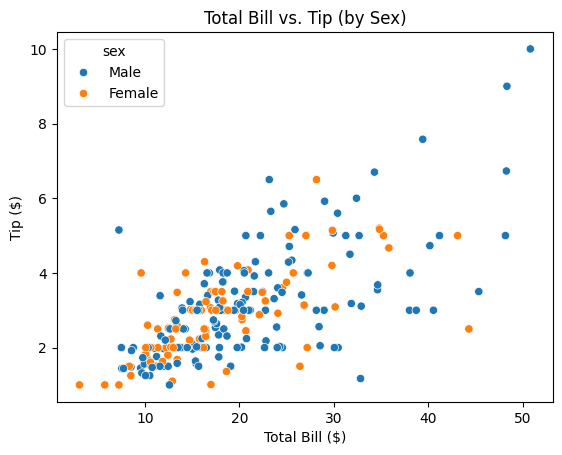

In [13]:
# Create a scatter plot of Total Bill vs. Tip
scatter_plt = sns.scatterplot(data=tips_clean, x="total_bill", y="tip", hue="sex")

scatter_plt.set_xlabel("Total Bill ($)")
scatter_plt.set_ylabel("Tip ($)")
scatter_plt.set_title("Total Bill vs. Tip (by Sex)")

plt.show()

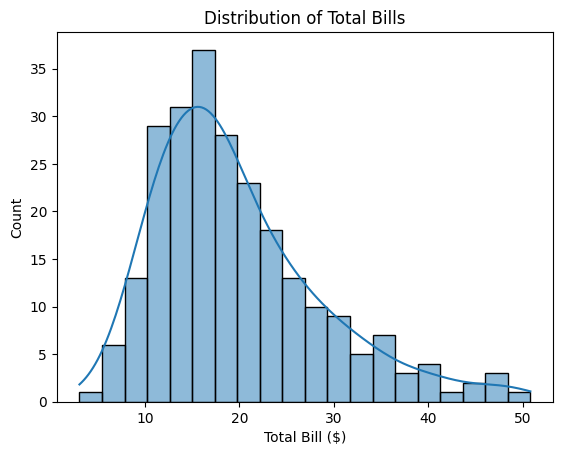

In [14]:
sns.histplot(data=tips_clean, x="total_bill", bins=20, kde=True)
plt.title("Distribution of Total Bills")
plt.xlabel("Total Bill ($)")
plt.ylabel("Count")
plt.show()

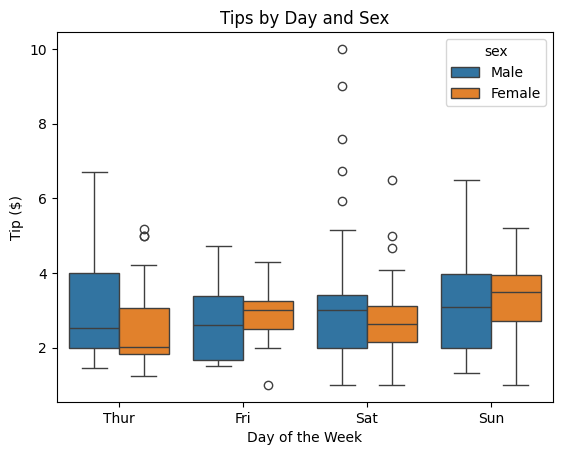

In [15]:
sns.boxplot(data=tips_clean, x="day", y="tip", hue="sex")
plt.title("Tips by Day and Sex")
plt.xlabel("Day of the Week")
plt.ylabel("Tip ($)")
plt.show()

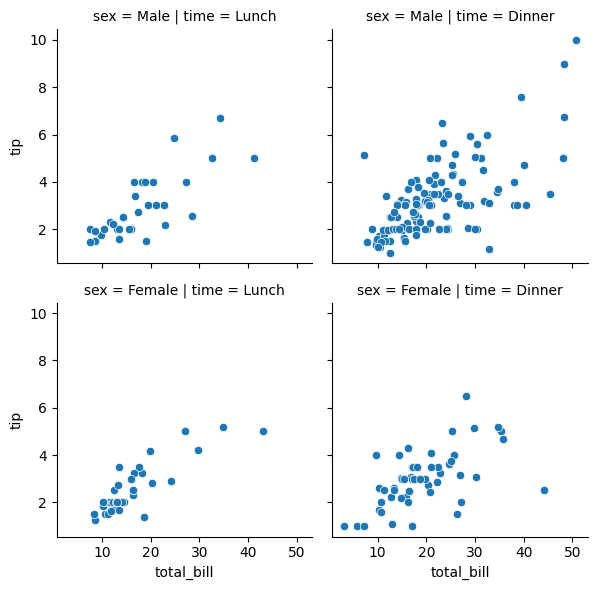

In [18]:
g = sns.FacetGrid(tips_clean, col="time", row="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()
plt.show()